In [1]:
import sys
sys.path.append("../DeepHedging")
from DeepHedging import DeepHedging
import tensorflow as tf
import time
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
# Load train data 2010-2020
data = np.load("../data/data_deephedging.npz")
X = data["X"]
simu = data["simu"]
numberOfTimeSteps = X.shape[1] - 1

# Download validation and test data using Yahoo Finance API (2020-2023)
start_date = "2020-06-01"
end_date = "2023-04-30"
data = pdr.get_data_yahoo("AAPL", start=start_date, end=end_date)

# Take rolling window
N = 60
X_val_test = np.array([data["Adj Close"].values[i:i+N+1]/data["Adj Close"].values[i] for i in range(len(data)-N)])

[*********************100%***********************]  1 of 1 completed


In [3]:
test_size = len(X_val_test) // 2
dic_data = {
    "train": X,
    "val": X_val_test[:test_size],
    "test": X_val_test[test_size:]
}

In [4]:
dic_data["train"].shape, dic_data["val"].shape, dic_data["test"].shape

((2475, 61), (337, 61), (337, 61))

# Deep Hedging using real data

## 1. Train model

In [5]:
deepHedging = DeepHedging(numberOfTimeSteps, dic_data["train"], dic_data["val"])
deepHedging.train_delta_strategy(1000, 128)


epoch 1/1000
19/19 [==============================] - 1s 53ms/step - loss: 0.0245
loss_train = 0.016541231827058033 - loss_val = 0.021340353758638627

epoch 2/1000
19/19 [==============================] - 1s 47ms/step - loss: 0.0194
loss_train = 0.010241518412252706 - loss_val = 0.013645798416140163

epoch 3/1000
19/19 [==============================] - 1s 52ms/step - loss: 0.0158
loss_train = 0.006224827391490177 - loss_val = 0.008586596198976426

epoch 4/1000
19/19 [==============================] - 1s 50ms/step - loss: 0.0131
loss_train = 0.003697827202038385 - loss_val = 0.005219050649852809

epoch 5/1000
19/19 [==============================] - 1s 50ms/step - loss: 0.0110
loss_train = 0.002299035154747474 - loss_val = 0.0031239933544481946

epoch 6/1000
19/19 [==============================] - 1s 47ms/step - loss: 0.0095
loss_train = 0.0017444157272670758 - loss_val = 0.0020377314745431093

epoch 7/1000
19/19 [==============================] - 1s 49ms/step - loss: 0.0083
loss_tra

19/19 [==============================] - 2s 89ms/step - loss: 0.0020
loss_train = 0.0006119879694697561 - loss_val = 0.0009876406522483553

epoch 55/1000
19/19 [==============================] - 1s 68ms/step - loss: 0.0020
loss_train = 0.0005982876391019263 - loss_val = 0.001029619546951163

epoch 56/1000
19/19 [==============================] - 2s 128ms/step - loss: 0.0020
loss_train = 0.0005862208454013581 - loss_val = 0.0010718381416541748

epoch 57/1000
19/19 [==============================] - 2s 91ms/step - loss: 0.0019
loss_train = 0.0005756017638678264 - loss_val = 0.0011133547208989855

epoch 58/1000
19/19 [==============================] - 1s 80ms/step - loss: 0.0019
loss_train = 0.0005662398664943455 - loss_val = 0.0011533778844420768

epoch 59/1000
19/19 [==============================] - 1s 78ms/step - loss: 0.0019
loss_train = 0.0005579677970918067 - loss_val = 0.0011913193704804319

epoch 60/1000
19/19 [==============================] - 1s 74ms/step - loss: 0.0019
loss_tr

19/19 [==============================] - 1s 46ms/step - loss: 0.0013
loss_train = 0.00048161253616767885 - loss_val = 0.0014782786717604337

epoch 108/1000
19/19 [==============================] - 1s 46ms/step - loss: 0.0013
loss_train = 0.0004807700931700642 - loss_val = 0.0014762286567993142

epoch 109/1000
19/19 [==============================] - 1s 46ms/step - loss: 0.0012
loss_train = 0.00047992084445750593 - loss_val = 0.0014741301915051983

epoch 110/1000
19/19 [==============================] - 1s 46ms/step - loss: 0.0012
loss_train = 0.00047906470854105696 - loss_val = 0.0014719834818000032

epoch 111/1000
19/19 [==============================] - 1s 46ms/step - loss: 0.0012
loss_train = 0.00047820160527307616 - loss_val = 0.001469788598648284

epoch 112/1000
19/19 [==============================] - 1s 44ms/step - loss: 0.0012
loss_train = 0.00047733145570990194 - loss_val = 0.001467545496827344

epoch 113/1000
19/19 [==============================] - 1s 45ms/step - loss: 0.001


epoch 160/1000
19/19 [==============================] - 1s 46ms/step - loss: 9.9461e-04
loss_train = 0.00042614169264661796 - loss_val = 0.0012919842380644173

epoch 161/1000
19/19 [==============================] - 1s 45ms/step - loss: 9.9110e-04
loss_train = 0.00042485845506142324 - loss_val = 0.0012866030336509164

epoch 162/1000
19/19 [==============================] - 1s 46ms/step - loss: 9.8762e-04
loss_train = 0.0004235649691151164 - loss_val = 0.0012811369855188891

epoch 163/1000
19/19 [==============================] - 1s 45ms/step - loss: 9.8418e-04
loss_train = 0.00042226106147289985 - loss_val = 0.0012755850592178711

epoch 164/1000
19/19 [==============================] - 1s 45ms/step - loss: 9.8077e-04
loss_train = 0.0004209465492603386 - loss_val = 0.0012699462007479821

epoch 165/1000
19/19 [==============================] - 1s 47ms/step - loss: 9.7740e-04
loss_train = 0.0004196212403857907 - loss_val = 0.0012642193367588615

epoch 166/1000
19/19 [====================

19/19 [==============================] - 1s 45ms/step - loss: 8.4876e-04
loss_train = 0.000344629665238936 - loss_val = 0.0008923664319234028

epoch 212/1000
19/19 [==============================] - 1s 44ms/step - loss: 8.4638e-04
loss_train = 0.0003427844559874984 - loss_val = 0.0008822553505751687

epoch 213/1000
19/19 [==============================] - 1s 45ms/step - loss: 8.4402e-04
loss_train = 0.00034094738849529835 - loss_val = 0.0008721350182071893

epoch 214/1000
19/19 [==============================] - 1s 45ms/step - loss: 8.4167e-04
loss_train = 0.00033912086191067596 - loss_val = 0.0008620170340763528

epoch 215/1000
19/19 [==============================] - 1s 48ms/step - loss: 8.3933e-04
loss_train = 0.0003373073852992257 - loss_val = 0.0008519136835390854

epoch 216/1000
19/19 [==============================] - 1s 45ms/step - loss: 8.3700e-04
loss_train = 0.00033550956600487 - loss_val = 0.0008418379069383472

epoch 217/1000
19/19 [==============================] - 1s 46m

loss_train = 0.0002931786447548193 - loss_val = 0.0005775248765894156

epoch 263/1000
19/19 [==============================] - 1s 46ms/step - loss: 7.4228e-04
loss_train = 0.00029290164708383414 - loss_val = 0.0005760529693143635

epoch 264/1000
19/19 [==============================] - 1s 46ms/step - loss: 7.4058e-04
loss_train = 0.00029263170996351166 - loss_val = 0.000574655303908803

epoch 265/1000
19/19 [==============================] - 1s 47ms/step - loss: 7.3889e-04
loss_train = 0.00029236828304633435 - loss_val = 0.0005733263468610369

epoch 266/1000
19/19 [==============================] - 1s 47ms/step - loss: 7.3721e-04
loss_train = 0.0002921108736450635 - loss_val = 0.0005720609518836832

epoch 267/1000
19/19 [==============================] - 1s 46ms/step - loss: 7.3554e-04
loss_train = 0.00029185904069409783 - loss_val = 0.0005708543417231024

epoch 268/1000
19/19 [==============================] - 1s 47ms/step - loss: 7.3388e-04
loss_train = 0.00029161238916716975 - loss_

19/19 [==============================] - 1s 47ms/step - loss: 6.6846e-04
loss_train = 0.000283027654209424 - loss_val = 0.0005402707082578937

epoch 315/1000
19/19 [==============================] - 1s 45ms/step - loss: 6.6724e-04
loss_train = 0.0002828731221140379 - loss_val = 0.000539827584519666

epoch 316/1000
19/19 [==============================] - 1s 46ms/step - loss: 6.6602e-04
loss_train = 0.00028271935114259017 - loss_val = 0.0005393879778026776

epoch 317/1000
19/19 [==============================] - 1s 47ms/step - loss: 6.6482e-04
loss_train = 0.0002825663208928342 - loss_val = 0.000538951798193965

epoch 318/1000
19/19 [==============================] - 1s 46ms/step - loss: 6.6362e-04
loss_train = 0.00028241401177594815 - loss_val = 0.0005385189616472064

epoch 319/1000
19/19 [==============================] - 1s 46ms/step - loss: 6.6242e-04
loss_train = 0.0002822624049861136 - loss_val = 0.0005380893895444943

epoch 320/1000
19/19 [==============================] - 1s 47m

loss_train = 0.000275840378447424 - loss_val = 0.0005211251550429211

epoch 366/1000
19/19 [==============================] - 1s 46ms/step - loss: 6.1331e-04
loss_train = 0.00027571003074109 - loss_val = 0.0005208084203922112

epoch 367/1000
19/19 [==============================] - 1s 47ms/step - loss: 6.1240e-04
loss_train = 0.0002755800098328074 - loss_val = 0.0005204936785548726

epoch 368/1000
19/19 [==============================] - 1s 45ms/step - loss: 6.1149e-04
loss_train = 0.0002754503132738736 - loss_val = 0.0005201809192726478

epoch 369/1000
19/19 [==============================] - 1s 47ms/step - loss: 6.1058e-04
loss_train = 0.00027532093867202776 - loss_val = 0.0005198701323197134

epoch 370/1000
19/19 [==============================] - 1s 47ms/step - loss: 6.0968e-04
loss_train = 0.0002751918836844214 - loss_val = 0.0005195613074900474

epoch 371/1000
19/19 [==============================] - 1s 47ms/step - loss: 6.0878e-04
loss_train = 0.00027506314601078536 - loss_val =

19/19 [==============================] - 1s 46ms/step - loss: 5.7182e-04
loss_train = 0.00026944288428432057 - loss_val = 0.0005070670034851846

epoch 418/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.7110e-04
loss_train = 0.00026932618362676247 - loss_val = 0.0005068400457650011

epoch 419/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.7039e-04
loss_train = 0.0002692096593944662 - loss_val = 0.000506614546660397

epoch 420/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.6967e-04
loss_train = 0.00026909330731496734 - loss_val = 0.000506390497607873

epoch 421/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.6896e-04
loss_train = 0.0002689771230586387 - loss_val = 0.00050616789019358

epoch 422/1000
19/19 [==============================] - 1s 48ms/step - loss: 5.6826e-04
loss_train = 0.00026886110223901864 - loss_val = 0.0005059467161554958

epoch 423/1000
19/19 [==============================] - 1s 47


epoch 469/1000
19/19 [==============================] - 1s 45ms/step - loss: 5.3817e-04
loss_train = 0.0002634980468624938 - loss_val = 0.000497051115933345

epoch 470/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.3759e-04
loss_train = 0.0002633835089573937 - loss_val = 0.000496891932736772

epoch 471/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.3701e-04
loss_train = 0.00026326883825949474 - loss_val = 0.0004967339515610659

epoch 472/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.3643e-04
loss_train = 0.0002631540264000698 - loss_val = 0.0004965771705971239

epoch 473/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.3586e-04
loss_train = 0.0002630390648748796 - loss_val = 0.0004964215881475139

epoch 474/1000
19/19 [==============================] - 1s 46ms/step - loss: 5.3529e-04
loss_train = 0.00026292394504082547 - loss_val = 0.0004962672026290895

epoch 475/1000
19/19 [=======================

19/19 [==============================] - 1s 47ms/step - loss: 5.1112e-04
loss_train = 0.000257270271537545 - loss_val = 0.0004904676494489527

epoch 521/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.1064e-04
loss_train = 0.00025713450231587066 - loss_val = 0.000490371233367261

epoch 522/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.1016e-04
loss_train = 0.00025699791785360385 - loss_val = 0.0004902762115051568

epoch 523/1000
19/19 [==============================] - 1s 49ms/step - loss: 5.0968e-04
loss_train = 0.0002568604976318747 - loss_val = 0.0004901825989289891

epoch 524/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.0920e-04
loss_train = 0.0002567222207862704 - loss_val = 0.0004900904115056594

epoch 525/1000
19/19 [==============================] - 1s 47ms/step - loss: 5.0872e-04
loss_train = 0.00025658306610480675 - loss_val = 0.0004899996659362523

epoch 526/1000
19/19 [==============================] - 1s 4

19/19 [==============================] - 1s 47ms/step - loss: 4.8827e-04
loss_train = 0.0002488033997813762 - loss_val = 0.00048794992160443963

epoch 572/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.8785e-04
loss_train = 0.00024859446733776136 - loss_val = 0.0004879724765069304

epoch 573/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.8744e-04
loss_train = 0.00024838347993993266 - loss_val = 0.0004879992343323292

epoch 574/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.8702e-04
loss_train = 0.0002481704271065181 - loss_val = 0.0004880303059367632

epoch 575/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.8661e-04
loss_train = 0.0002479553003160347 - loss_val = 0.0004880658026410911

epoch 576/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.8620e-04
loss_train = 0.0002477380931139497 - loss_val = 0.0004881058357560987

epoch 577/1000
19/19 [==============================] - 1s

19/19 [==============================] - 1s 48ms/step - loss: 4.6829e-04
loss_train = 0.00023587695379360656 - loss_val = 0.0004953108845084992

epoch 623/1000
19/19 [==============================] - 1s 49ms/step - loss: 4.6792e-04
loss_train = 0.0002355947767691593 - loss_val = 0.0004955442373359055

epoch 624/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.6755e-04
loss_train = 0.00023531238410597869 - loss_val = 0.0004957775109132413

epoch 625/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.6719e-04
loss_train = 0.0002350298169974915 - loss_val = 0.0004960104736842871

epoch 626/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.6682e-04
loss_train = 0.00023474711438487526 - loss_val = 0.0004962428968536384

epoch 627/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.6645e-04
loss_train = 0.00023446431289937352 - loss_val = 0.0004964745543261081

epoch 628/1000
19/19 [==============================] - 1

19/19 [==============================] - 1s 47ms/step - loss: 4.5030e-04
loss_train = 0.00022154527005719362 - loss_val = 0.0005031261444908835

epoch 674/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.4997e-04
loss_train = 0.00022126331367352018 - loss_val = 0.0005031365646433303

epoch 675/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.4963e-04
loss_train = 0.00022098094948517304 - loss_val = 0.0005031402990971972

epoch 676/1000
19/19 [==============================] - 1s 46ms/step - loss: 4.4930e-04
loss_train = 0.00022069814435512998 - loss_val = 0.000503137341501652

epoch 677/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.4896e-04
loss_train = 0.0002204148645125763 - loss_val = 0.0005031276882782642

epoch 678/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.4863e-04
loss_train = 0.00022013107557072083 - loss_val = 0.0005031113384325548

epoch 679/1000
19/19 [==============================] - 1

19/19 [==============================] - 1s 48ms/step - loss: 4.3380e-04
loss_train = 0.00020582687183925272 - loss_val = 0.0004953452984769333

epoch 725/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.3349e-04
loss_train = 0.00020547158509977133 - loss_val = 0.0004950293817843874

epoch 726/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.3318e-04
loss_train = 0.00020511360960456075 - loss_val = 0.0004947073161719613

epoch 727/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.3286e-04
loss_train = 0.00020475289166056236 - loss_val = 0.0004943790955339248

epoch 728/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.3255e-04
loss_train = 0.0002043893774702946 - loss_val = 0.0004940447124981423

epoch 729/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.3224e-04
loss_train = 0.00020402301316984093 - loss_val = 0.0004937041584333103

epoch 730/1000
19/19 [==============================] - 

19/19 [==============================] - 1s 48ms/step - loss: 4.1823e-04
loss_train = 0.0001833161477741769 - loss_val = 0.00047103295702465936

epoch 776/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.1792e-04
loss_train = 0.00018277513722770187 - loss_val = 0.0004703793838255006

epoch 777/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.1762e-04
loss_train = 0.0001822307542461761 - loss_val = 0.00046971871823634956

epoch 778/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.1732e-04
loss_train = 0.00018168310847246403 - loss_val = 0.00046905096222498436

epoch 779/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.1702e-04
loss_train = 0.00018113231833169914 - loss_val = 0.00046837612039372293

epoch 780/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.1672e-04
loss_train = 0.00018057851117705517 - loss_val = 0.0004676942001635558

epoch 781/1000
19/19 [==============================]

19/19 [==============================] - 1s 48ms/step - loss: 4.0295e-04
loss_train = 0.0001555426220073055 - loss_val = 0.0004300886813119834

epoch 827/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.0265e-04
loss_train = 0.00015509710333025574 - loss_val = 0.0004292108182799556

epoch 828/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.0236e-04
loss_train = 0.00015465863171798062 - loss_val = 0.00042833576542436664

epoch 829/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.0206e-04
loss_train = 0.00015422726055004007 - loss_val = 0.00042746394985697064

epoch 830/1000
19/19 [==============================] - 1s 47ms/step - loss: 4.0176e-04
loss_train = 0.00015380303193123374 - loss_val = 0.00042659579583943303

epoch 831/1000
19/19 [==============================] - 1s 48ms/step - loss: 4.0147e-04
loss_train = 0.0001533859770660508 - loss_val = 0.0004257317233290041

epoch 832/1000
19/19 [==============================] 

19/19 [==============================] - 1s 48ms/step - loss: 3.8817e-04
loss_train = 0.00014106537205916527 - loss_val = 0.0003949738634251126

epoch 878/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.8789e-04
loss_train = 0.00014091218478397513 - loss_val = 0.00039453346835816754

epoch 879/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.8762e-04
loss_train = 0.00014076226087014702 - loss_val = 0.00039410188272097243

epoch 880/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.8734e-04
loss_train = 0.00014061551114769076 - loss_val = 0.000393678964686633

epoch 881/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.8706e-04
loss_train = 0.00014047184827221254 - loss_val = 0.000393264570333806

epoch 882/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.8678e-04
loss_train = 0.000140331186736639 - loss_val = 0.0003928585540276392

epoch 883/1000
19/19 [==============================] - 1

19/19 [==============================] - 1s 49ms/step - loss: 3.7453e-04
loss_train = 0.0001359817988563453 - loss_val = 0.0003808465629225569

epoch 929/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.7428e-04
loss_train = 0.00013591547032222175 - loss_val = 0.0003806863536303797

epoch 930/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.7402e-04
loss_train = 0.00013584980791478749 - loss_val = 0.0003805289819285879

epoch 931/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.7377e-04
loss_train = 0.00013578478943578962 - loss_val = 0.0003803743818531469

epoch 932/1000
19/19 [==============================] - 1s 54ms/step - loss: 3.7352e-04
loss_train = 0.0001357203933927825 - loss_val = 0.0003802224892332178

epoch 933/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.7326e-04
loss_train = 0.00013565659897995012 - loss_val = 0.0003800732416591398

epoch 934/1000
19/19 [==============================] - 1

19/19 [==============================] - 1s 48ms/step - loss: 3.6213e-04
loss_train = 0.00013312299828311278 - loss_val = 0.0003752928815757648

epoch 980/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.6190e-04
loss_train = 0.0001330729886467371 - loss_val = 0.00037522269744254754

epoch 981/1000
19/19 [==============================] - 1s 48ms/step - loss: 3.6166e-04
loss_train = 0.00013302309397803297 - loss_val = 0.00037515362611653257

epoch 982/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.6143e-04
loss_train = 0.00013297331038531114 - loss_val = 0.00037508565528991585

epoch 983/1000
19/19 [==============================] - 1s 49ms/step - loss: 3.6120e-04
loss_train = 0.00013292363411233262 - loss_val = 0.0003750187731129343

epoch 984/1000
19/19 [==============================] - 1s 47ms/step - loss: 3.6097e-04
loss_train = 0.00013287406153391005 - loss_val = 0.0003749529681794339

epoch 985/1000
19/19 [==============================]

## 2. Results

In [6]:
print(f"price = {np.round(deepHedging.price.numpy(), 4)}")

price = 0.0452


In [7]:
df_stats_deephedging = pd.DataFrame(columns=["train", "val", "test"], index=["mean", "std"])
for key in df_stats_deephedging.columns:
    time = tf.tile(deepHedging.vtimestep_Euler[tf.newaxis,:], [len(dic_data[key]),1])
    state = tf.concat([time[:,:-1,tf.newaxis], dic_data[key][:,:-1,tf.newaxis]], axis=2)
    strategy_pnl =  deepHedging.delta_hedge(state)[:,:,0] * tf.experimental.numpy.diff(dic_data[key], n=1, axis=-1)

    Pnl = deepHedging.price.numpy() + tf.reduce_sum(strategy_pnl, axis=1).numpy()
    payoff = deepHedging.payoff(dic_data[key][:,-1]).numpy()
    df_stats_deephedging[key].loc["mean"] = np.mean(Pnl - payoff)
    df_stats_deephedging[key].loc["std"] = np.std(Pnl - payoff)

df_stats_deephedging

,train,val,test
mean,-0.001856,-0.008968,-0.017538
std,0.011491,0.017863,0.015967


# Deep Hedging using SBTS data

## 1. Train model

In [8]:
deepHedgingSimu = DeepHedging(numberOfTimeSteps, simu, dic_data["val"])
deepHedgingSimu.train_delta_strategy(600, 128)


epoch 1/600
78/78 [==============================] - 4s 45ms/step - loss: 0.0229
loss_train = 0.0038803207768081435 - loss_val = 0.003664584491168535

epoch 2/600
78/78 [==============================] - 3s 45ms/step - loss: 0.0114
loss_train = 0.0009819953148617624 - loss_val = 0.000920118238939672

epoch 3/600
78/78 [==============================] - 4s 45ms/step - loss: 0.0071
loss_train = 0.0008169842157096461 - loss_val = 0.0005683016477120631

epoch 4/600
78/78 [==============================] - 4s 45ms/step - loss: 0.0053
loss_train = 0.0007857151107088003 - loss_val = 0.00048068112508502784

epoch 5/600
78/78 [==============================] - 3s 45ms/step - loss: 0.0043
loss_train = 0.0007670174373188796 - loss_val = 0.00046032472179603106

epoch 6/600
78/78 [==============================] - 3s 44ms/step - loss: 0.0037
loss_train = 0.0007474650687714853 - loss_val = 0.00045558937843271616

epoch 7/600
78/78 [==============================] - 3s 44ms/step - loss: 0.0032
loss_

78/78 [==============================] - 3s 45ms/step - loss: 8.0103e-04
loss_train = 0.00035051238310351975 - loss_val = 0.0006775045624681145

epoch 55/600
78/78 [==============================] - 3s 44ms/step - loss: 7.9271e-04
loss_train = 0.0003444804747533242 - loss_val = 0.0006689147757143014

epoch 56/600
78/78 [==============================] - 3s 45ms/step - loss: 7.8456e-04
loss_train = 0.0003381013932905547 - loss_val = 0.0006597321761481212

epoch 57/600
78/78 [==============================] - 3s 45ms/step - loss: 7.7658e-04
loss_train = 0.0003313088309361933 - loss_val = 0.0006499286736698776

epoch 58/600
78/78 [==============================] - 3s 44ms/step - loss: 7.6874e-04
loss_train = 0.0003240219972498302 - loss_val = 0.0006394814133972539

epoch 59/600
78/78 [==============================] - 3s 45ms/step - loss: 7.6104e-04
loss_train = 0.0003161570325117636 - loss_val = 0.0006283691661879566

epoch 60/600
78/78 [==============================] - 4s 45ms/step - l

78/78 [==============================] - 4s 45ms/step - loss: 5.1329e-04
loss_train = 0.00017025069905152567 - loss_val = 0.00040208648823784177

epoch 107/600
78/78 [==============================] - 4s 46ms/step - loss: 5.1008e-04
loss_train = 0.00016923075180378606 - loss_val = 0.00040113687496614686

epoch 108/600
78/78 [==============================] - 4s 45ms/step - loss: 5.0691e-04
loss_train = 0.00016817600965771202 - loss_val = 0.00040013762118316833

epoch 109/600
78/78 [==============================] - 4s 45ms/step - loss: 5.0379e-04
loss_train = 0.0001670823464342575 - loss_val = 0.00039908791370424026

epoch 110/600
78/78 [==============================] - 4s 46ms/step - loss: 5.0072e-04
loss_train = 0.0001659449453420758 - loss_val = 0.0003979864994102787

epoch 111/600
78/78 [==============================] - 4s 45ms/step - loss: 4.9769e-04
loss_train = 0.00016475812703352127 - loss_val = 0.0003968314879986518

epoch 112/600
78/78 [==============================] - 4s 

loss_train = 0.00010978317483114301 - loss_val = 0.00036345854660425317

epoch 158/600
78/78 [==============================] - 4s 45ms/step - loss: 3.8776e-04
loss_train = 0.00010967843798493943 - loss_val = 0.00036373288921118745

epoch 159/600
78/78 [==============================] - 4s 46ms/step - loss: 3.8601e-04
loss_train = 0.00010957830165741003 - loss_val = 0.0003639965768864104

epoch 160/600
78/78 [==============================] - 4s 47ms/step - loss: 3.8429e-04
loss_train = 0.0001094824061510231 - loss_val = 0.000364249796348195

epoch 161/600
78/78 [==============================] - 4s 46ms/step - loss: 3.8259e-04
loss_train = 0.00010939043107169148 - loss_val = 0.0003644927432933685

epoch 162/600
78/78 [==============================] - 4s 45ms/step - loss: 3.8091e-04
loss_train = 0.00010930208735504042 - loss_val = 0.0003647256225979828

epoch 163/600
78/78 [==============================] - 4s 46ms/step - loss: 3.7925e-04
loss_train = 0.00010921711148447096 - loss_val

78/78 [==============================] - 4s 45ms/step - loss: 3.1975e-04
loss_train = 0.000106743466133342 - loss_val = 0.0003689095970662729

epoch 210/600
78/78 [==============================] - 4s 45ms/step - loss: 3.1874e-04
loss_train = 0.00010669931111386593 - loss_val = 0.00036893702785536115

epoch 211/600
78/78 [==============================] - 4s 45ms/step - loss: 3.1774e-04
loss_train = 0.00010665519522825286 - loss_val = 0.00036896409075956203

epoch 212/600
78/78 [==============================] - 4s 46ms/step - loss: 3.1675e-04
loss_train = 0.00010661110999340761 - loss_val = 0.0003689908542266759

epoch 213/600
78/78 [==============================] - 4s 45ms/step - loss: 3.1577e-04
loss_train = 0.00010656704738724183 - loss_val = 0.0003690173837140308

epoch 214/600
78/78 [==============================] - 3s 45ms/step - loss: 3.1480e-04
loss_train = 0.00010652299982207526 - loss_val = 0.00036904374190161615

epoch 215/600
78/78 [==============================] - 4s 4

78/78 [==============================] - 4s 45ms/step - loss: 2.7801e-04
loss_train = 0.00010444374719804488 - loss_val = 0.0003708524579734741

epoch 261/600
78/78 [==============================] - 4s 46ms/step - loss: 2.7735e-04
loss_train = 0.0001043968900698164 - loss_val = 0.00037091835378357777

epoch 262/600
78/78 [==============================] - 4s 46ms/step - loss: 2.7670e-04
loss_train = 0.0001043499757805015 - loss_val = 0.0003709858459150739

epoch 263/600
78/78 [==============================] - 4s 46ms/step - loss: 2.7605e-04
loss_train = 0.00010430300693513021 - loss_val = 0.00037105495259233325

epoch 264/600
78/78 [==============================] - 4s 46ms/step - loss: 2.7540e-04
loss_train = 0.00010425598624523364 - loss_val = 0.0003711256905177174

epoch 265/600
78/78 [==============================] - 4s 45ms/step - loss: 2.7476e-04
loss_train = 0.00010420891652412012 - loss_val = 0.0003711980748002492

epoch 266/600
78/78 [==============================] - 4s 45

loss_train = 0.00010205516094065936 - loss_val = 0.0003761912315797148

epoch 312/600
78/78 [==============================] - 4s 45ms/step - loss: 2.4915e-04
loss_train = 0.00010201028660766522 - loss_val = 0.00037632624107324835

epoch 313/600
78/78 [==============================] - 4s 46ms/step - loss: 2.4869e-04
loss_train = 0.00010196557752508868 - loss_val = 0.00037646172745500446

epoch 314/600
78/78 [==============================] - 4s 46ms/step - loss: 2.4823e-04
loss_train = 0.00010192103906897291 - loss_val = 0.00037659763892306777

epoch 315/600
78/78 [==============================] - 4s 47ms/step - loss: 2.4777e-04
loss_train = 0.00010187667657287163 - loss_val = 0.00037673392304849454

epoch 316/600
78/78 [==============================] - 4s 46ms/step - loss: 2.4731e-04
loss_train = 0.00010183249532008887 - loss_val = 0.0003768705268290586

epoch 317/600
78/78 [==============================] - 4s 46ms/step - loss: 2.4686e-04
loss_train = 0.00010178850053596116 - loss

78/78 [==============================] - 4s 47ms/step - loss: 2.2859e-04
loss_train = 0.00010003191285069833 - loss_val = 0.0003827308218812678

epoch 364/600
78/78 [==============================] - 4s 46ms/step - loss: 2.2824e-04
loss_train = 0.00010000027140751204 - loss_val = 0.0003828290034018841

epoch 365/600
78/78 [==============================] - 4s 46ms/step - loss: 2.2790e-04
loss_train = 9.996890977903992e-05 - loss_val = 0.00038292578091897635

epoch 366/600
78/78 [==============================] - 4s 46ms/step - loss: 2.2755e-04
loss_train = 9.993782643902106e-05 - loss_val = 0.0003830211560163351

epoch 367/600
78/78 [==============================] - 4s 46ms/step - loss: 2.2721e-04
loss_train = 9.990701977136509e-05 - loss_val = 0.0003831151315744639

epoch 368/600
78/78 [==============================] - 4s 46ms/step - loss: 2.2687e-04
loss_train = 9.987648807518608e-05 - loss_val = 0.0003832077117164533

epoch 369/600
78/78 [==============================] - 4s 46ms/

78/78 [==============================] - 4s 46ms/step - loss: 2.1264e-04
loss_train = 9.871074812851215e-05 - loss_val = 0.0003862251113011008

epoch 416/600
78/78 [==============================] - 4s 46ms/step - loss: 2.1237e-04
loss_train = 9.86907553828271e-05 - loss_val = 0.000386267412517974

epoch 417/600
78/78 [==============================] - 4s 47ms/step - loss: 2.1210e-04
loss_train = 9.8670926951383e-05 - loss_val = 0.00038630906594295763

epoch 418/600
78/78 [==============================] - 4s 46ms/step - loss: 2.1183e-04
loss_train = 9.865126088844347e-05 - loss_val = 0.00038635008518574153

epoch 419/600
78/78 [==============================] - 4s 46ms/step - loss: 2.1157e-04
loss_train = 9.863175527304301e-05 - loss_val = 0.0003863904835723399

epoch 420/600
78/78 [==============================] - 4s 46ms/step - loss: 2.1130e-04
loss_train = 9.861240820889674e-05 - loss_val = 0.0003864302741450839

epoch 421/600
78/78 [==============================] - 4s 46ms/step 

78/78 [==============================] - 4s 46ms/step - loss: 2.0011e-04
loss_train = 9.78521706021452e-05 - loss_val = 0.00038779640210670165

epoch 468/600
78/78 [==============================] - 4s 47ms/step - loss: 1.9990e-04
loss_train = 9.783862969358881e-05 - loss_val = 0.0003878175664078644

epoch 469/600
78/78 [==============================] - 4s 47ms/step - loss: 1.9968e-04
loss_train = 9.782517955139089e-05 - loss_val = 0.0003878384849270825

epoch 470/600
78/78 [==============================] - 4s 46ms/step - loss: 1.9947e-04
loss_train = 9.781181918506005e-05 - loss_val = 0.0003878591612214149

epoch 471/600
78/78 [==============================] - 4s 46ms/step - loss: 1.9926e-04
loss_train = 9.779854761543514e-05 - loss_val = 0.0003878795987601579

epoch 472/600
78/78 [==============================] - 4s 46ms/step - loss: 1.9905e-04
loss_train = 9.778536387448472e-05 - loss_val = 0.00038789980092769963

epoch 473/600
78/78 [==============================] - 4s 46ms/st

78/78 [==============================] - 4s 46ms/step - loss: 1.9001e-04
loss_train = 9.724917226271541e-05 - loss_val = 0.00038863179879929013

epoch 520/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8984e-04
loss_train = 9.723924852003546e-05 - loss_val = 0.0003886435446524786

epoch 521/600
78/78 [==============================] - 4s 46ms/step - loss: 1.8966e-04
loss_train = 9.722937610185105e-05 - loss_val = 0.00038865515763821407

epoch 522/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8949e-04
loss_train = 9.721955445343118e-05 - loss_val = 0.00038866663910251654

epoch 523/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8931e-04
loss_train = 9.720978302675559e-05 - loss_val = 0.00038867799037596297

epoch 524/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8914e-04
loss_train = 9.720006128045677e-05 - loss_val = 0.0003886892127742496

epoch 525/600
78/78 [==============================] - 4s 46ms

78/78 [==============================] - 4s 47ms/step - loss: 1.8169e-04
loss_train = 9.67905651437881e-05 - loss_val = 0.0003890930034036848

epoch 572/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8154e-04
loss_train = 9.678270307822705e-05 - loss_val = 0.00038909938243782144

epoch 573/600
78/78 [==============================] - 4s 46ms/step - loss: 1.8140e-04
loss_train = 9.677487070857594e-05 - loss_val = 0.0003891056851379736

epoch 574/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8125e-04
loss_train = 9.676706772473908e-05 - loss_val = 0.0003891119123775809

epoch 575/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8111e-04
loss_train = 9.675929381918015e-05 - loss_val = 0.0003891180650223518

epoch 576/600
78/78 [==============================] - 4s 47ms/step - loss: 1.8097e-04
loss_train = 9.675154868685582e-05 - loss_val = 0.0003891241439302917

epoch 577/600
78/78 [==============================] - 4s 47ms/ste

## 2. Results

In [9]:
print(f"price = {np.round(deepHedgingSimu.price.numpy(), 4)}")

price = 0.0509


In [10]:
df_stats_deephedgingSimu = pd.DataFrame(columns=["train", "val", "test"], index=["mean", "std"])
for key in df_stats_deephedgingSimu.columns:
    time = tf.tile(deepHedgingSimu.vtimestep_Euler[tf.newaxis,:], [len(dic_data[key]),1])
    state = tf.concat([time[:,:-1,tf.newaxis], dic_data[key][:,:-1,tf.newaxis]], axis=2)
    strategy_pnl =  deepHedgingSimu.delta_hedge(state)[:,:,0] * tf.experimental.numpy.diff(dic_data[key], n=1, axis=-1)

    Pnl = deepHedgingSimu.price.numpy() + tf.reduce_sum(strategy_pnl, axis=1).numpy()
    payoff = deepHedgingSimu.payoff(dic_data[key][:,-1]).numpy()
    df_stats_deephedgingSimu[key].loc["mean"] = np.mean(Pnl - payoff)
    df_stats_deephedgingSimu[key].loc["std"] = np.std(Pnl - payoff)

In [11]:
df_stats_deephedgingSimu

,train,val,test
mean,0.002585,-0.004624,-0.013646
std,0.012178,0.018299,0.015717


# PnL distribution Data versus SBTS

In [12]:
dic_deephedging_pnl = {}

def get_pnl(deepHedging_model, key):
    
    time = tf.tile(deepHedging_model.vtimestep_Euler[tf.newaxis,:], [len(dic_data[key]),1])
    state = tf.concat([time[:,:-1,tf.newaxis], dic_data[key][:,:-1,tf.newaxis]], axis=2)
    strategy_pnl =  deepHedging_model.delta_hedge(state)[:,:,0] * tf.experimental.numpy.diff(dic_data[key], n=1, axis=-1)

    Pnl = deepHedging_model.price.numpy() + tf.reduce_sum(strategy_pnl, axis=1).numpy()
    payoff = deepHedging_model.payoff(dic_data[key][:,-1]).numpy()
    
    return Pnl - payoff

dic_deephedging_pnl_val = {
    "Data": get_pnl(deepHedging, "val"),
    "SBTS": get_pnl(deepHedgingSimu, "val")
} 

dic_deephedging_pnl_test = {
    "Data": get_pnl(deepHedging, "test"),
    "SBTS": get_pnl(deepHedgingSimu, "test")
}

In [13]:
def plot_pnl_distribution(dic_deephedging_pnl):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(10,7))
    df_plot = pd.DataFrame()
    N = len(dic_deephedging_pnl["Data"])
    df_plot["PnL"] = dic_deephedging_pnl["Data"].tolist() + dic_deephedging_pnl["SBTS"].tolist()
    df_plot["Legend"] = ["Data"] * N + ["SBTS"] * N
    ax = sns.displot(data=df_plot, x="PnL", hue="Legend", kind="kde", height=7, fill=True, ec='Navy', lw=2, alpha=0.5)
    plt.xlabel(r"$\mathrm{PnL}$", fontsize=14)
    plt.ylabel(r"$\mathrm{Density}$", fontsize=14)
    plt.legend(fontsize=17)
    ax._legend.get_title().set_text("")
    plt.setp(ax._legend.get_texts(), fontsize=14)

## 1. Validation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x700 with 0 Axes>

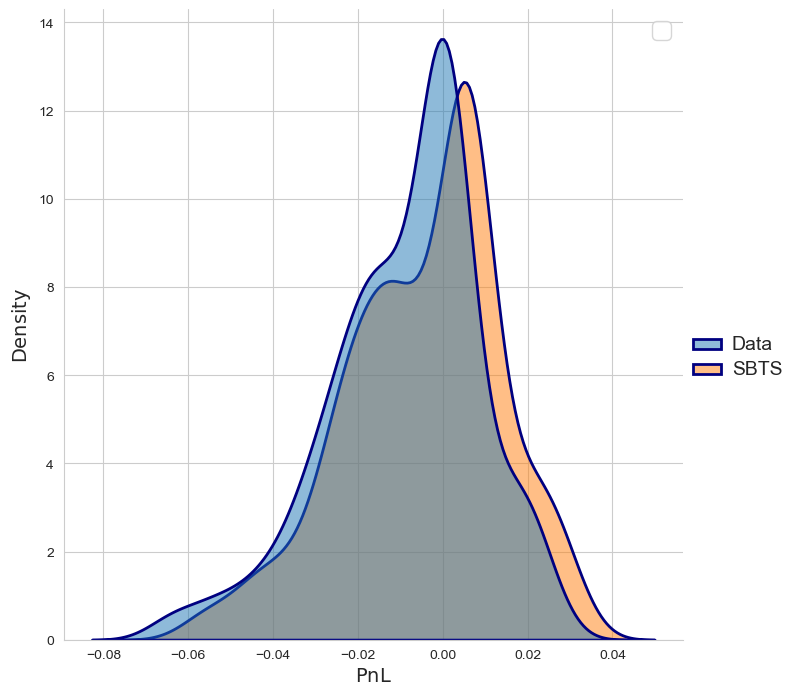

In [14]:
plot_pnl_distribution(dic_deephedging_pnl_val)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x700 with 0 Axes>

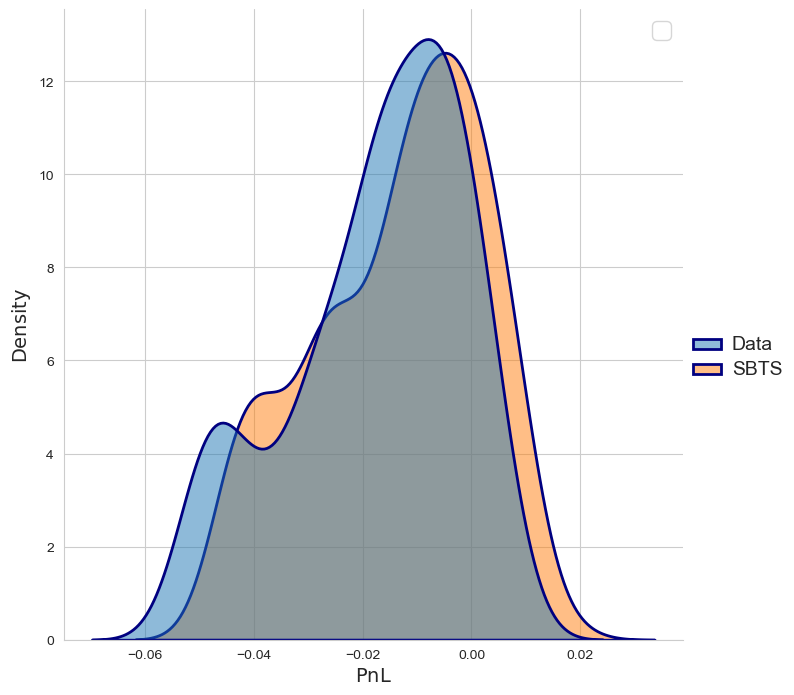

In [15]:
plot_pnl_distribution(dic_deephedging_pnl_test)